<a href="https://colab.research.google.com/github/mariel0503/aprendizaje-automatico-252601/blob/main/4_2_M%C3%A9todos_de_clustering_basados_en_particiones_(1)_Milan_Mariel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🎓 **Taller 4.2: Taller de Métodos de clustering basados en particiones.**


## OBJETIVOS DEL TALLER:
En esta práctica estudiaremos el funcionamiento y la utilización métodos de clustering basados en particiones, como el K-means y el K-medoids

# 🔧 **CONFIGURACIÓN INICIAL**

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import itertools as it

from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

plt.rcParams['figure.figsize'] = [8, 8]

# 📁 **CARGAR LOS DATASETS Y GRAFICAR SUS DISTRIBUCIONES**

In [37]:
# Cargar dataset artificial
def cargar_dataset(nombre_dataset):
    try:
        # Intentar cargar desde URL alternativa
        data_file_url = "https://raw.githubusercontent.com/SandraNavarrete-docente/aprendizaje-automatico-252601/main/04-MODELOS-NO-SUPERVISADOS/data/"+nombre_dataset
        D = np.array(pd.read_excel(data_file_url,header=0))
        print("✅ Dataset cargado desde URL GitHub")
        return D
    except:
        print("❌ No se pudo cargar el dataset")
        return None

✅ Dataset cargado desde URL GitHub


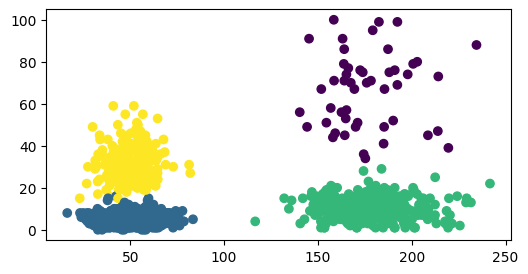

In [38]:
# Cargar dataset
D =cargar_dataset("dataset_cuatro_diferente_densidad.xlsx")
Dx = D[:,0:2]
Dy = D[:,2]
fig, ax = plt.subplots(figsize=(6,3))
ax.scatter(Dx[:,0],Dx[:,1], c=Dy)

# 🎯 **EJ 1:Cree el algoritmo K-means que tiene un único parámetro: el número de clústeres (K).**

In [39]:
# PASO 1 elejir los centros iniciales de forma randomica
def random_sample_float(n, mi, ma):
    return (ma - mi) * np.random.random_sample(n) + mi

def paso1_elije_centros(K, Dx):
  cDx = np.zeros(K*Dx.shape[1])
  cDx.shape = (K,Dx.shape[1])
  # 1.1 Completa el codigo aqui
  x1=random_sample_float(K, np.min(Dx[:,0]), np.max(Dx[:,0]))
  x2 =random_sample_float(K, np.min(Dx[:,1]), np.max(Dx[:,1]))
  cDx[:,0]=x1
  cDx[:,1]=x2
  return cDx


Los centros iniciales elegidos aleatoriamente son:
[[ 20.373841    55.61577009]
 [239.88839345  16.82845193]
 [ 24.17089836  82.60421635]
 [108.59724264   6.23685248]]


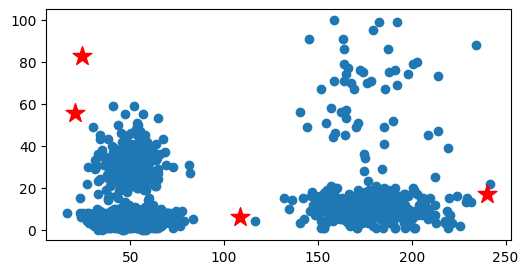

In [40]:
print('Los centros iniciales elegidos aleatoriamente son:')
K=4
cDx = paso1_elije_centros(K, Dx)
print(cDx)
fig, ax = plt.subplots(figsize=(6,3))
ax.scatter(Dx[:,0],Dx[:,1])
ax.scatter(cDx[:,0],cDx[:,1], marker='*', s=200, c='r')

2.   Paso de asignación de datos
En este paso, cada elemento de nuestro dataset se asigna al centroide más cercano basado en la distancia escogida: en nuestro caso, la Euclidiana. Por tanto, tendremos que implementar la siguiente operación:

$$
\DeclareMathOperator*{\argminA}{arg\,min}
\argminA_{c_i \in C} dist\left ( c_i, x \right )^2
$$

In [41]:
# Definimos la distancia euclidiana de una instancia x con respecto a un grupo de instancias C
def distancia_euclidiana_grupo(x, C):
  return np.linalg.norm(C - x, axis=1);

def paso2_asigna_puntos(Dx, cDx):
  Dyp = np.zeros(Dx.shape[0])
  # Buscamos el centro más cercano a cada instancia y la asignamos a ese clúster
  for i in np.arange(Dx.shape[0]):
      # Tenemos que calcular la distancia de cada muestra del dataset Dx[i]
      # a cada centro existente en cDx. Podemos utilizar para ello la función
      # distancia_euclidiana_grupo.

      distancia_punto_a_centros =  distancia_euclidiana_grupo(Dx[i], cDx)# 1.2 Completa el codigo aqui

      # Una vez calculada la distancia, necesitamos averiguar el índice de
      # la distancia mínima. Para ello, podemos usar la función argmin de numpy.
      pred_y = np.argmin(distancia_punto_a_centros)
      Dyp[i] = pred_y
  return Dyp

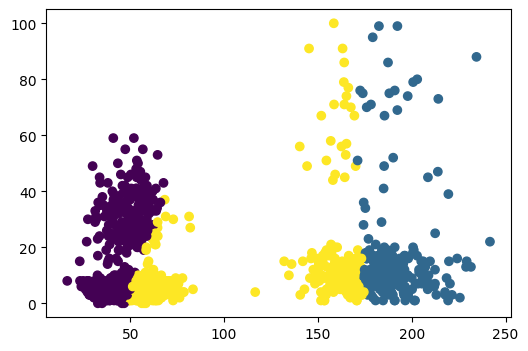

In [42]:
Dyp = paso2_asigna_puntos(Dx, cDx)
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(Dx[:,0],Dx[:,1], c=Dyp)

2.   Paso de actualización del centroide
En este paso se recalcula el centroide de cada cluster, teniendo en cuenta la nueva asignación calculada en el paso 1. Para ello, se calcula la media de todos los puntos asignados en el paso anterior.

$$
c_i = \frac{1}{\left | S_i \right |} \sum_{x_i \in S_i} x_i
$$


In [43]:
def paso3_actualiza_centros(Dx, cDx, Dyp, K):
  cDx_ant = cDx.copy()
  for k in range(K):
      # Seleccionamos los puntos asignados al cluster k
      puntos_cluster_k = Dx[Dyp == k]
      # Calculamos la media de las coordenadas x e y
      if len(puntos_cluster_k) > 0:  # Evitar división por cero si el cluster está vacío
          cDx[k,:] = np.mean(puntos_cluster_k, axis=0)# 1.3 Completa el codigo aqui
      else:
          # Si el cluster está vacío, mantenemos el centroide anterior
          cDx[k,:] = cDx_ant[k,:]
  return cDx

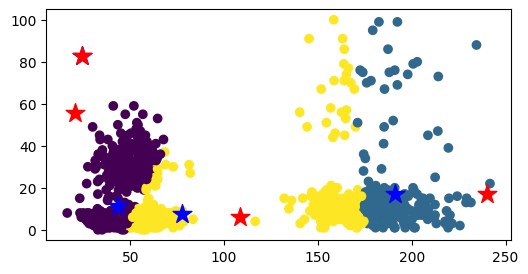

In [44]:
cDx_ant = cDx.copy()
cDx =paso3_actualiza_centros(Dx, cDx, Dyp, K)
fig, ax = plt.subplots(figsize=(6,3))
ax.scatter(Dx[:,0],Dx[:,1], c=Dyp)
ax.scatter(cDx[:,0],cDx[:,1], marker='*', s=200, c='b')
ax.scatter(cDx_ant[:,0],cDx_ant[:,1], marker='*', s=200, c='r')

Y esto es todo. Este proceso se repite hasta cumplir un criterio de detención:

*   No hay cambios en los puntos asignados a cada cluster
*   La suma de las distancias alcanza un valor mínimo establecido
*   Se alcanza un número máximo de iteraciones

In [45]:
def MyKMeans(Dx, K):
  cDx = paso1_elije_centros(K, Dx)# 1.4 Completa el codigo aqui
  cDxIni = cDx.copy()
  # Flag de convergencia
  iterando = True
  while iterando:
    # Vector auxiliar para guardar los centros de la iteración pasada
    # necesarios para identificar la convergencia
    cDx_ant = cDx.copy()
    Dyp = paso2_asigna_puntos(Dx, cDx)# 1.5 Completa el codigo aqui
    # Calcular los nuevos centros
    cDx = paso3_actualiza_centros(Dx, cDx, Dyp, K)# 1.6 Completa el codigo aqui
    iterando = (np.absolute(np.sum(cDx-cDx_ant)) > 0.00001)
  return cDx, Dyp, cDxIni

[[ 57.88252336   9.47429907]
 [ 41.7559012    7.71695594]
 [179.48675287  10.6091954 ]
 [175.6826087   68.36956522]]


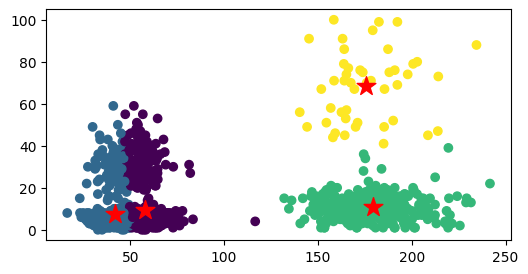

In [46]:
cDx, Dyp,cDxIni = MyKMeans(Dx, 4)
fig, ax = plt.subplots(figsize=(6,3))
ax.scatter(Dx[:,0],Dx[:,1], c=Dyp)
ax.scatter(cDx[:,0],cDx[:,1], marker='*', s=200, c='r')
print(cDx)

# 🎯 **EJ 2: COMPARE SUS RESULTADOS CON SCIKIT-LEARN**

Centros encontrados por...
el método programado:
[[ 57.88252336   9.47429907]
 [ 41.7559012    7.71695594]
 [179.48675287  10.6091954 ]
 [175.6826087   68.36956522]]
el método de Sci-kit Learn:
[[ 50.24671674   5.20600858]
 [179.3065043   10.59025788]
 [ 50.78213592  32.0776699 ]
 [175.6826087   68.36956522]]


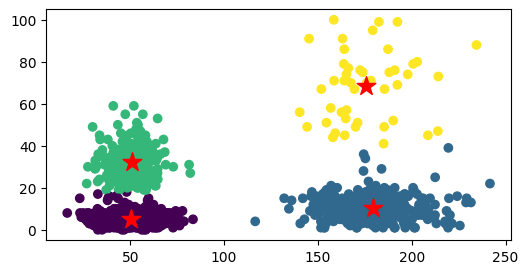

In [47]:
from sklearn.cluster import KMeans

# Se inicializa KMeans con el número de clústeres a buscar
modelo = KMeans(n_clusters=4, random_state=0)# 2.1 Completa el codigo aqui
# Se entrena el modelo
modelo.fit(Dx) # 2.2 Completa el codigo aqui
# Se predice los clusters
Dyp_sk = modelo.predict(Dx) # 2.3 Completa el codigo aqui
# Obtener los centros de los clústeres
cDx_sk = modelo.cluster_centers_

# Comparing with scikit-learn centroids
print('Centros encontrados por...')
print('el método programado:')
print(cDx)
print('el método de Sci-kit Learn:')
print(cDx_sk)

# Ver asignaciones finales
fig, ax = plt.subplots(figsize=(6,3))
ax.scatter(Dx[:,0],Dx[:,1], c=Dyp_sk)
ax.scatter(cDx_sk[:,0],cDx_sk[:,1], marker='*', s=200, c='r')


### 📈 **RESULTADOS:**
**Conteste las siguientes preguntas**

¿Porque difieren los grupos de sklearn con el algoritmo que tu implementaste?

Los resultados difieren porque ambos algoritmos parten de centroides iniciales distintos y además K-means es sensible a esa inicialización, lo que nos puede llevar a soluciones finales diferentes. Asimismo, en la implementación los centros se inicializan de forma aleatoria y se ejecuta una sola vez, por lo que algunos clústeres cercanos (como los de menor coordenada 𝑥) pueden quedar agrupados de manera diferente. En cambio, scikit-learn utiliza k-means++ y múltiples reinicios, lo que le permite separar mejor grupos con distintas densidades y elegir la solución con menor inercia. En conclusión, aunque ambos métodos detectan estructuras similares y comparten al menos un centro casi idéntico, la distribución final de los clústeres no coincide exactamente.


# 🎯 **EJ 3: USA LAS METRICAS INTRINSECAS Y EXTRINSECAS PARA DECIDIR QUE TAN BIEN AGRUPADOS ESTAN LOS DATOS**

In [48]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(Dx, Dyp_sk)# 3.1 Completa
print(silhouette_avg)


0.5900131037332426


In [49]:
from sklearn.metrics import calinski_harabasz_score

calinski_harabasz_score_avg = calinski_harabasz_score(Dx, Dyp_sk)# 3.2 Completa
print(calinski_harabasz_score_avg)


10596.232506708026


In [50]:
def medida_R_cuadrado(X, Xyp, cXs):
    centros_dataset = np.mean(X,axis=0)
    n_clusters = np.sort(np.unique(Xyp))
    distancia_a_centros_dataset = np.sum((X-centros_dataset)**2)
    distancias_intracluster = np.zeros(n_clusters.size)
    for k in np.arange(n_clusters.size):
        distancias_intracluster[k] = np.sum((X[Xyp==n_clusters[k], :] - cXs[n_clusters[k], :])**2)
    distancia_intracluster = np.sum(distancias_intracluster)
    # 3.3
    return 1 - (distancia_intracluster / distancia_a_centros_dataset)## Tu código aquí ##

In [51]:
# 3.4 usa R cuadrado
R2=medida_R_cuadrado(Dx, Dyp_sk, cDx_sk)
print(R2)


0.9409478492159826


In [52]:
def calcular_inercia(X, labels, centros):
    inercia = 0
    for i, centro in enumerate(centros):
        puntos_cluster = X[labels == i]
        if len(puntos_cluster) > 0:
            distancias = np.sum((puntos_cluster - centro) ** 2, axis=1)
            inercia += np.sum(distancias)
    return inercia

In [53]:
#3.8 usa la inercia
inercia_valor = calcular_inercia(Dx, Dyp_sk, cDx_sk)
print(inercia_valor)

346980.45098976814


### 📈 **RESULTADOS:**
**Interpreta con las medidas intrinsecas que tan bien agrupado estan los clusters**

Coeficiente de Silueta:
El valor de 0.59 indica que los clústeres están bien definidos y razonablemente separados, lo que refleja un buen agrupamiento, aunque con un leve solapamiento entre algunos grupos.

Índice de Calinski-Harabasz:
El valor alto de 10596.23 muestra que los clústeres son compactos internamente y están claramente separados entre sí, confirmando una buena calidad del clustering.

Medida R²:
El resultado de R² = 0.94 indica que el clustering es muy bueno, ya que explica el 94 % de la variabilidad de los datos y muestra una alta cohesión dentro de los clústeres.

Inercia:
La inercia de 346 980.45 refleja clústeres compactos considerando la escala del conjunto de datos y, al compararse con otros valores de
𝑘, confirma la coherencia del agrupamiento obtenido.



# 🚀 ¡TALLER FINALIZADO!"